<img src="images/cads-logo.png" style="height: 100px;" align=left> 
<img src="images/eds.png" style="height: 100px;" align=right> 

# EDS Capstone

## Submission Guideline

1. Create a team (2-3 people)
2. Perform the following:
    1. **Data Preprocessing - Integrity Check, Exploratory Data Analysis, Cleaning
    2. **Feature Engineering**: Make new features or change the current features
    3. **Feature Selection**: Choose the best features
    4. **Predictive Models**: Create several predictive models and tune the hyperparameters
    5. **Model Evaluation**: Compare the performance of the models
    6. **Choose the Best Model**: Choose the model that has the best performance

The output expected at the end of this hackathon is:
1. One **Jupyter notebook** containing all analysis performed using Python.
2. One **PowerPoint** presentation containing the analysis results. Each group will be allocated 15-20 minutes (inclusive of Q&A) to present their analysis results to the class.


All submissions are to be emailed to the trainer email address **by 3:00 pm of the last day**, indicating the names of all group members and your team name in your email.

## Presentation Guideline

**Note(s):**
1. Only **one submission** is required per group.
2. Include full details in your notebook and **report only important results** in your presentation.
3. Please only use Jupyter notebook (pandas) to clean the data (Do not clean manually using Excel)

## Objective
#### Design a predictive model to determine the potential customers. The target variable is `Potential_Customer`. 

You have been provided with information such as customers spending for last sevral years, the amount of money spent, Number of inactive months and so on.

## Data Description
- Below is the description of each feature available in the dataset
<img src="images/MicrosoftTeams-image.png" style="height: 700px">

# 1. Import necessary Packages

In [53]:
import numpy as np
import pandas as pd
from IPython.display import display

### 2. Load the Data into Pandas Dataframe

In [114]:
data = pd.read_csv("data.csv")
pd.set_option('display.max_columns', None)
data.head(10)

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,InAct_First,Ad_Res_1_year,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,9946,$5.00,2,17,2,4,$0.00,$7.50,$7.76,$7.50,14,110,32,48,73,3,12,16,A,0,71.0,F,H,"$65,957.00"
1,1,87939,$30.00,1,7,0,3,$25.00,$25.00,$13.00,NaN,18,75,13,35,55,6,6,22,A,1,7.0,M,U,$0.00
2,0,88003,NaN,5,12,3,5,$15.00,$15.00,$11.25,$14.67,19,57,14,35,53,6,17,22,S,1,79.0,F,U,$0.00
3,1,188721,$20.00,1,11,0,3,$20.00,$20.00,$12.45,NaN,5,113,17,38,71,8,8,33,A,0,73.0,F,U,"$76,293.00"
4,1,88056,$5.00,3,15,2,7,$3.00,$4.33,$3.80,$4.00,17,118,13,28,63,6,12,24,S,1,68.0,F,H,"$113,663.00"
5,1,88119,$10.00,4,15,4,12,$10.00,$7.75,$7.00,$7.75,16,120,14,34,72,6,16,33,A,1,67.0,F,H,"$62,230.00"
6,0,88113,NaN,3,12,3,8,$18.00,$18.00,$14.58,$18.00,24,111,11,32,63,6,17,27,A,1,78.0,M,H,"$62,230.00"
7,0,88092,NaN,1,3,1,3,$20.00,$20.00,$18.33,$20.00,20,58,10,23,36,4,10,14,A,0,48.0,M,H,"$62,230.00"
8,1,88153,$13.00,4,16,3,9,$5.00,$7.75,$8.06,$7.00,24,122,6,26,60,3,14,27,S,1,49.0,F,H,"$56,828.00"
9,0,88151,NaN,4,14,4,14,$16.00,$14.50,$11.57,$14.50,16,104,14,34,72,6,16,30,S,1,63.0,M,H,"$56,828.00"


# 3. Data Integrity Check

Data Cleaning (Checking the existance of missing values, the type of variables, or integrity of data) should be done on the whole data. But EDA (checking the relationship of variables, summary of data, outliers, filling missing values etc.) should be done only on train set because we assume our analysis never sees the test set. However, if for instance we decide to fill missing values in one variable with specific number as the result of EDA on train set, then all missing values in both train and test will be filled with than value.

**Attention:**
> Be careful about information leakage from test set!

## 3.1. How big is the data? (number of rows, features and their types)

In [ ]:
# checking the shape of dataframe
data.shape

(4469, 25)

In [56]:
# check the summary of the data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential_Customer        4469 non-null   int64  
 1   C_ID                      4469 non-null   int64  
 2   Cust_Last_Purchase        2149 non-null   object 
 3   Pur_3_years               4469 non-null   int64  
 4   Pur_5_years               4469 non-null   int64  
 5   Pur_3_years_Indirect      4469 non-null   int64  
 6   Pur_5_years_Indirect      4469 non-null   int64  
 7   Pur_latest                4469 non-null   object 
 8   Pur_3_years_Avg           4469 non-null   object 
 9   Pur_5_years_Avg           4469 non-null   object 
 10  Pur_3_years_Avg_Indirect  3642 non-null   object 
 11  InAct_Last                4469 non-null   int64  
 12  InAct_First               4469 non-null   int64  
 13  Ad_Res_1_year             4469 non-null   int64  
 14  Ad_Res_3

### 3.1.1 Why columns such as `Cust_Last_Purchase` are `object` while they should be `float64`?
#### 3.1.1.1 Remove the dollar sign and comma from data

**Hint:** You can use `df.col=df.col.str.replace('OldSign', 'NewSign')` 

**Example:** `data.Cust_Last_Purchase=data.Cust_Last_Purchase.str.replace('$', '')`

In [115]:
# standardizing the column names to lowercase
data.columns = data.columns.str.lower()
data.columns

# visualize column names
data.columns

Index(['potential_customer', 'c_id', 'cust_last_purchase', 'pur_3_years',
       'pur_5_years', 'pur_3_years_indirect', 'pur_5_years_indirect',
       'pur_latest', 'pur_3_years_avg', 'pur_5_years_avg',
       'pur_3_years_avg_indirect', 'inact_last', 'inact_first',
       'ad_res_1_year', 'ad_res_3_year', 'ad_res_5_year', 'ad_res_ind_1_year',
       'ad_res_ind_3_year', 'ad_res_ind_5_year', 'status_cust',
       'status_latest_ad', 'age', 'gender', 'cust_prop', 'cust_ann_income'],
      dtype='object')

In [116]:
for col in ['cust_last_purchase','pur_latest', 'pur_3_years_avg', 'pur_5_years_avg', 'pur_3_years_avg_indirect', 'cust_ann_income']:
    data[col] = data[col].str.replace('$', '')
    data[col] = data[col].str.replace(',', '')

data.head()

C:\Users\THINKP~1\AppData\Local\Temp/ipykernel_38584/1543572078.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[col] = data[col].str.replace('$', '')


,potential_customer,c_id,cust_last_purchase,pur_3_years,pur_5_years,pur_3_years_indirect,pur_5_years_indirect,pur_latest,pur_3_years_avg,pur_5_years_avg,pur_3_years_avg_indirect,inact_last,inact_first,ad_res_1_year,ad_res_3_year,ad_res_5_year,ad_res_ind_1_year,ad_res_ind_3_year,ad_res_ind_5_year,status_cust,status_latest_ad,age,gender,cust_prop,cust_ann_income
0,1,9946,5.00,2,17,2,4,0.00,7.50,7.76,7.50,14,110,32,48,73,3,12,16,A,0,71.0,F,H,65957.00
1,1,87939,30.00,1,7,0,3,25.00,25.00,13.00,NaN,18,75,13,35,55,6,6,22,A,1,7.0,M,U,0.00
2,0,88003,NaN,5,12,3,5,15.00,15.00,11.25,14.67,19,57,14,35,53,6,17,22,S,1,79.0,F,U,0.00
3,1,188721,20.00,1,11,0,3,20.00,20.00,12.45,NaN,5,113,17,38,71,8,8,33,A,0,73.0,F,U,76293.00
4,1,88056,5.00,3,15,2,7,3.00,4.33,3.80,4.00,17,118,13,28,63,6,12,24,S,1,68.0,F,H,113663.00


In [117]:
# change relevent data type from object to float
for col in ['cust_last_purchase', 'pur_latest', 'pur_3_years_avg', 'pur_5_years_avg', 'pur_3_years_avg_indirect', 'cust_ann_income']:
    data[col] = pd.to_numeric(data[col], errors='coerce')
    
# recheck the summary of the data frame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   potential_customer        4469 non-null   int64  
 1   c_id                      4469 non-null   int64  
 2   cust_last_purchase        2149 non-null   float64
 3   pur_3_years               4469 non-null   int64  
 4   pur_5_years               4469 non-null   int64  
 5   pur_3_years_indirect      4469 non-null   int64  
 6   pur_5_years_indirect      4469 non-null   int64  
 7   pur_latest                4469 non-null   float64
 8   pur_3_years_avg           4469 non-null   float64
 9   pur_5_years_avg           4469 non-null   float64
 10  pur_3_years_avg_indirect  3642 non-null   float64
 11  inact_last                4469 non-null   int64  
 12  inact_first               4469 non-null   int64  
 13  ad_res_1_year             4469 non-null   int64  
 14  ad_res_3

## 3.2. Check data for duplicate rows

In [118]:
# checking for duplicated entries
def check_duplicate(d,c):
    if len(d[c])>len(set(d[c])):
        print('Data has duplicates')
    else:
        print('Data does not have duplicate')

check_duplicate(data, 'c_id')

Data has duplicates


In [ ]:
# check for duplicate entries detail
data[data.duplicated()].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


potential_customer                                                    413
c_id                                                             76170844
cust_last_purchase                                                 6221.0
pur_3_years                                                          2764
pur_5_years                                                          9320
pur_3_years_indirect                                                 1573
pur_5_years_indirect                                                 4922
pur_latest                                                        13206.0
pur_3_years_avg         7.50 25.00 15.00 20.00 4.33 7.75 18.00 20.00 7...
pur_5_years_avg         7.76 13.00 11.25 12.45 3.80 7.00 14.58 18.33 8...
inact_last                                                          15215
inact_first                                                         61910
ad_res_1_year                                                       11261
ad_res_3_year                         

### 3.2.1 Remove duplicate rows
**Hint:** Use `df=df.drop_duplicates()`

In [119]:
# remove duplicate entries from the data frame
data = data.drop_duplicates()

# recheck the summary of the data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3618 entries, 0 to 3617
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   potential_customer        3618 non-null   int64  
 1   c_id                      3618 non-null   int64  
 2   cust_last_purchase        1736 non-null   float64
 3   pur_3_years               3618 non-null   int64  
 4   pur_5_years               3618 non-null   int64  
 5   pur_3_years_indirect      3618 non-null   int64  
 6   pur_5_years_indirect      3618 non-null   int64  
 7   pur_latest                3618 non-null   float64
 8   pur_3_years_avg           3618 non-null   float64
 9   pur_5_years_avg           3618 non-null   float64
 10  pur_3_years_avg_indirect  2956 non-null   float64
 11  inact_last                3618 non-null   int64  
 12  inact_first               3618 non-null   int64  
 13  ad_res_1_year             3618 non-null   int64  
 14  ad_res_3

## 3.3. Do we need `C_ID` in our analysis?


In [120]:
# dropping the c_id column
data.drop(["c_id"], axis=1, inplace=True)

In [121]:
# recheck column names
data.columns

# 'c_id' column has been removed

Index(['potential_customer', 'cust_last_purchase', 'pur_3_years',
       'pur_5_years', 'pur_3_years_indirect', 'pur_5_years_indirect',
       'pur_latest', 'pur_3_years_avg', 'pur_5_years_avg',
       'pur_3_years_avg_indirect', 'inact_last', 'inact_first',
       'ad_res_1_year', 'ad_res_3_year', 'ad_res_5_year', 'ad_res_ind_1_year',
       'ad_res_ind_3_year', 'ad_res_ind_5_year', 'status_cust',
       'status_latest_ad', 'age', 'gender', 'cust_prop', 'cust_ann_income'],
      dtype='object')

## 3.4. Check if the column types are accurate? if not fix them

In [122]:
CatCols = ['potential_customer', 'status_cust', 'status_latest_ad', 'gender', 'cust_prop']
NumCols = list(set(data.columns)-set(CatCols))

In [123]:
# recheck numerical variable column names
data[NumCols].columns

Index(['ad_res_1_year', 'age', 'pur_3_years_indirect',
       'pur_3_years_avg_indirect', 'ad_res_5_year', 'pur_5_years',
       'ad_res_ind_3_year', 'cust_ann_income', 'ad_res_3_year',
       'ad_res_ind_5_year', 'pur_5_years_indirect', 'inact_last',
       'cust_last_purchase', 'pur_3_years', 'pur_latest', 'pur_5_years_avg',
       'ad_res_ind_1_year', 'inact_first', 'pur_3_years_avg'],
      dtype='object')

# 4. Split data to train/test 

Split the data into 75/25 train/test set. Use random_state=42 and stratify=y

In [124]:
# select independent variables
X = data.drop(columns='potential_customer')

# select dependent variables
y = data.loc[:, 'potential_customer'] 

# prove that the variables were selected correctly
print(X.columns, '\n')

# prove that the variables were selected correctly
print(y.name)

Index(['cust_last_purchase', 'pur_3_years', 'pur_5_years',
       'pur_3_years_indirect', 'pur_5_years_indirect', 'pur_latest',
       'pur_3_years_avg', 'pur_5_years_avg', 'pur_3_years_avg_indirect',
       'inact_last', 'inact_first', 'ad_res_1_year', 'ad_res_3_year',
       'ad_res_5_year', 'ad_res_ind_1_year', 'ad_res_ind_3_year',
       'ad_res_ind_5_year', 'status_cust', 'status_latest_ad', 'age', 'gender',
       'cust_prop', 'cust_ann_income'],
      dtype='object') 

potential_customer


In [125]:
import sklearn.model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# 5. Exploratory Data Analysis (EDA)

## 5.1. Explore Categorical Variables

In [126]:
# returns object containing counts of unique values
for catcols in CatCols:
    print('Column: {} \nUnique Values:\n{} \nCount Values:\n{} \n\n-----------------------------------\n'.format(catcols, data[catcols].unique(), data[catcols].value_counts()))

Column: potential_customer 
Unique Values:
[1 0] 
Count Values:
0    1882
1    1736
Name: potential_customer, dtype: int64 

-----------------------------------

Column: status_cust 
Unique Values:
['A' 'S' 'E' 'F' 'N' 'L'] 
Count Values:
A    2146
S     964
F     219
N     207
E      72
L      10
Name: status_cust, dtype: int64 

-----------------------------------

Column: status_latest_ad 
Unique Values:
[0 1] 
Count Values:
1    2057
0    1561
Name: status_latest_ad, dtype: int64 

-----------------------------------

Column: gender 
Unique Values:
['F' 'M' 'U'] 
Count Values:
F    1922
M    1530
U     166
Name: gender, dtype: int64 

-----------------------------------

Column: cust_prop 
Unique Values:
['H' 'U'] 
Count Values:
H    1981
U    1637
Name: cust_prop, dtype: int64 

-----------------------------------



In [69]:
# import necessary packages
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

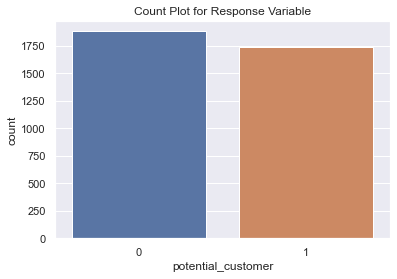

In [70]:
# visualize count plot for response variable
sns.countplot(data=data, x='potential_customer')
plt.title('Count Plot for Response Variable');

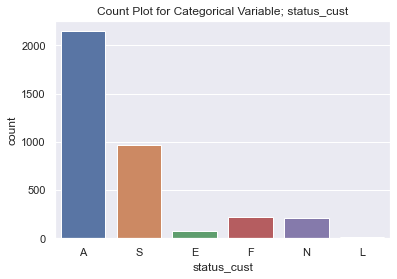

In [71]:
# visualize count plot for status_cust
sns.countplot(data=data, x='status_cust')
plt.title('Count Plot for Categorical Variable; status_cust');

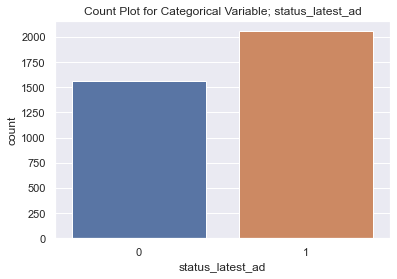

In [72]:
# visualize count plot for status_latest_ad
sns.countplot(data=data, x='status_latest_ad')
plt.title('Count Plot for Categorical Variable; status_latest_ad');

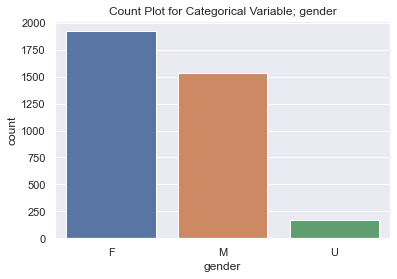

In [73]:
# visualize count plot for gender
sns.countplot(data=data, x='gender')
plt.title('Count Plot for Categorical Variable; gender');

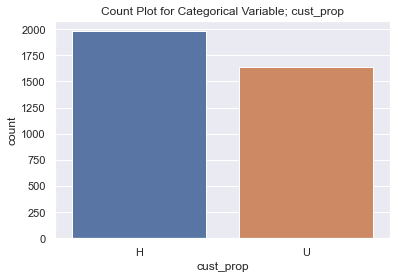

In [74]:
# visualize count plot for cust_prop
sns.countplot(data=data, x='cust_prop')
plt.title('Count Plot for Categorical Variable; cust_prop');

## 5.2. Explore Relationship Between Categorical & Target Variable

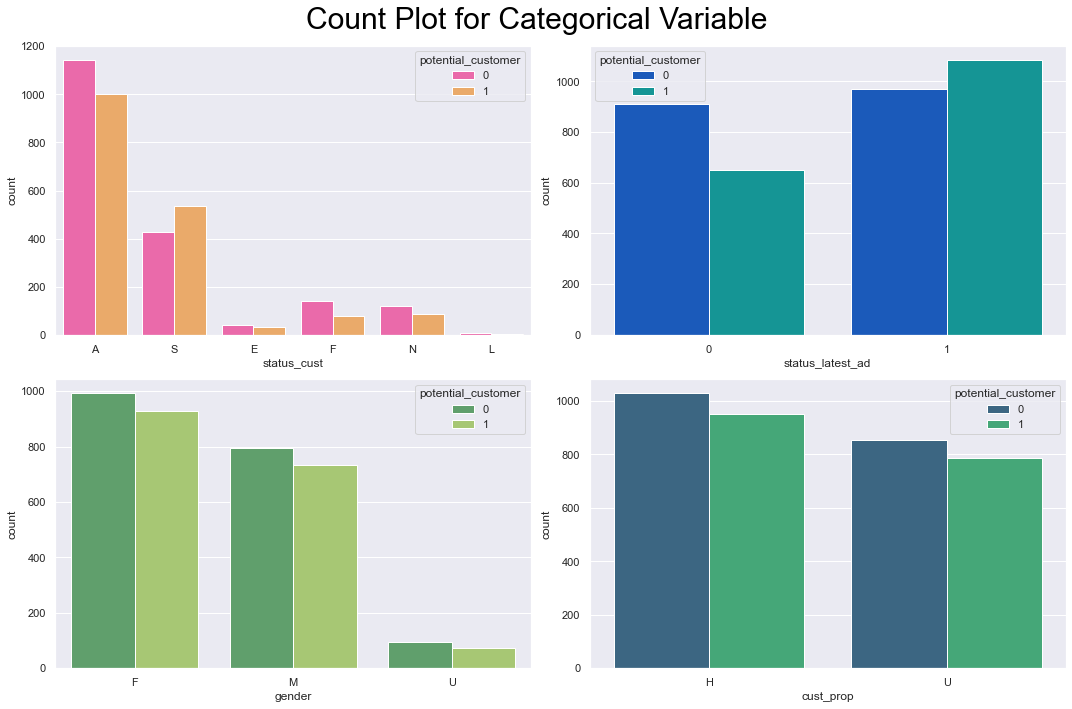

In [75]:
# create a figure for relationship between categorical and target variable
fig, ax = plt.subplots(2, 2, figsize=(15,10))
plt.suptitle('Count Plot for Categorical Variable', fontsize=30, color='black')

ax1 = sns.countplot(x='status_cust', data=data, hue='potential_customer', ax=ax[0,0], palette='spring')
ax1.set(xlabel='status_cust')

ax2 = sns.countplot(x='status_latest_ad', data=data, hue='potential_customer', ax=ax[0,1], palette='winter')
ax2.set(xlabel='status_latest_ad')

ax3 = sns.countplot(x='gender', data=data, hue='potential_customer', ax=ax[1,0], palette='summer')
ax3.set(xlabel='gender')

ax4 = sns.countplot(x='cust_prop', data=data, hue='potential_customer', ax=ax[1,1], palette='viridis')
ax4.set(xlabel='cust_prop')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
As depicted in the count plot above, we can extract the following conclusions by analyzing the relationship between categorical and target variable: <br> 

1. Only star buyers (`S`) have higher number of potential customers that remain (`1`) as compared to those who leave (`0`).
2. Customers who have purchased in response to the last promotional sale (`1`) are most likely a potential customers that stay. 
3. Female (`F`) and male (`M`) have the same count plot trend; the number of potential customers that remain are lower (`1`) as compared to those who leave (`0`).
4. Customers who own a property (`H`) are most likely a potential customers that stay.
</div>

### 5.2.1 Insight

<Figure size 2000x600 with 0 Axes>

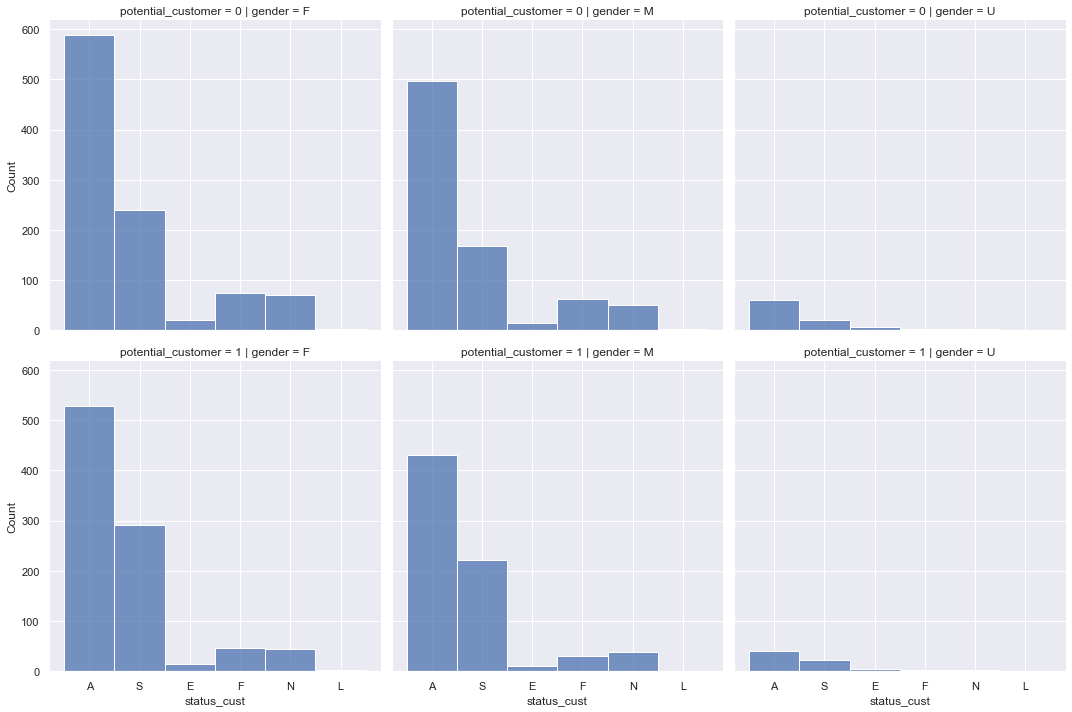

In [76]:
# create a figure for relationship between categorical and target variable
plt.figure(figsize=(10,3), dpi=200)
sns.displot(data=data, x='status_cust', bins=70, col='gender', row='potential_customer');

<Figure size 2000x600 with 0 Axes>

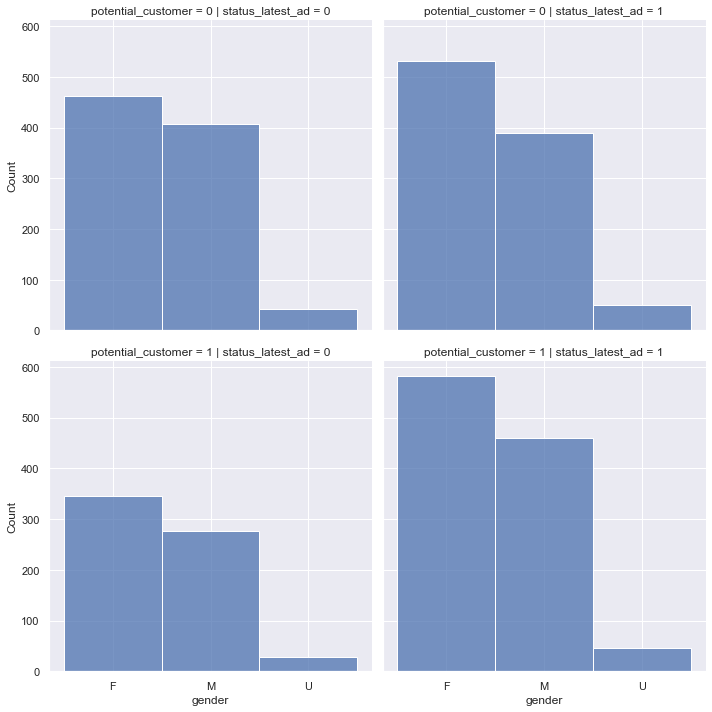

In [77]:
# create a figure for relationship between categorical and target variable
plt.figure(figsize=(10,3), dpi=200)
sns.displot(data=data, x='gender', bins=70, col='status_latest_ad', row='potential_customer');

<Figure size 2000x600 with 0 Axes>

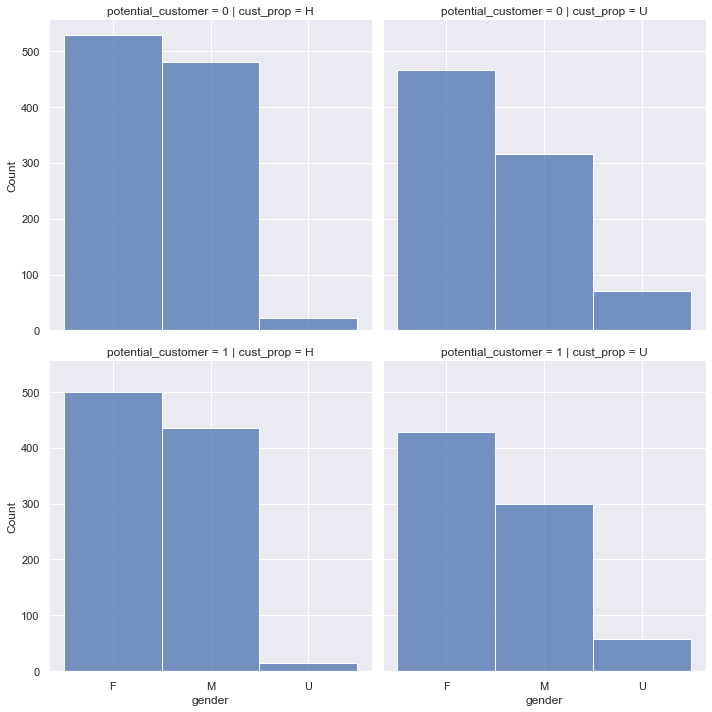

In [78]:
# create a figure for relationship between categorical and target variable
plt.figure(figsize=(10,3), dpi=200)
sns.displot(data=data, x='gender', bins=70, col='cust_prop', row='potential_customer');

<div class="alert alert-block alert-info">
As depicted in the displots above, we can extract the following conclusions by analyzing the relationship between categorical and target variable: <br> 

1. Based on 'status_cust' plot, female customers have highest number of active and star buyers as compared to male customers, however huge number of active female potential customers have left, whereas huge number of active male customers have left as well which we believe can contribute to great profit loss.
2. Based on 'status_latest_ad' plot, female customers have highest number of purchased in response to the last promotional sale and they are most likely a potential customer that stays which we believe can contribute to the profit gain.
3. Based on 'cust_prop' plot, despite whether the customers own a property or not, the number of potential customers that left are higher than that who remain. Therefore,  we do not expect cust_prop to have significant predictive power.
</div>

### 5.2.2 Solution

<div class="alert alert-block alert-info">
Based on the conclusions drawn above, we should increase the number of promotional sale especially for both female and male active customers in order to have a better profit gain because these groups of people who contribute to greater profit loss.
</div>

## 5.3. Explore Numerical Variables

In [79]:
# define catcols and numcols
catcols = ['potential_customer', 'status_cust', 'status_latest_ad', 'gender', 'cust_prop']
numcols = list(set(data.columns) - set(catcols))

# check unique values of each catcols
for numcols in numcols:
    print('Column: {} \nUnique Values:\n{} \nCount Values:\n{} \n\n-----------------------------------\n'.format(numcols, data[numcols].unique(), data[numcols].value_counts()))

Column: ad_res_1_year 
Unique Values:
[32 13 14 17 11 10  6 12 15  9 24 22 27  7 28 29 35 30  8 20 33 18 16 34
 21  5 23  4 25 26 39 42 36 19 47 31 38 37 45  3 49 40] 
Count Values:
13    884
12    693
14    393
11    358
10    358
15    149
9     139
8     108
7     100
6      51
16     42
27     22
22     21
29     20
26     20
5      19
17     19
18     18
25     18
24     17
20     16
19     16
23     16
4      14
32     13
30     12
28     10
35     10
31      9
21      9
33      8
34      7
36      6
39      5
37      4
42      3
38      3
45      3
40      2
47      1
3       1
49      1
Name: ad_res_1_year, dtype: int64 

-----------------------------------

Column: age 
Unique Values:
[71.  7. 79. 73. 68. 67. 78. 48. 49. 63. 37. 45. 42. 17. 76. 40. 80. nan
 77. 62. 43. 41. 27. 65.  6. 69. 35. 51. 85. 70. 50. 53. 66. 60. 72. 44.
 55. 75. 59. 81. 33. 36. 58. 57. 34. 87. 38.  0. 52. 83. 25. 64. 31. 30.
 56. 47. 46. 82. 22. 74. 84. 61. 29. 39. 86. 28. 54. 32. 26. 24. 23. 21.
 19. 

In [80]:
# the mean of number of purchase
print("The mean of number of purchase are: ")
data[['pur_3_years', 'pur_5_years', 'pur_3_years_indirect', 'pur_5_years_indirect']].mean()

The mean of number of purchase are: 


pur_3_years              3.308734
pur_5_years             11.018795
pur_3_years_indirect     1.909066
pur_5_years_indirect     5.887507
dtype: float64

No handles with labels found to put in legend.


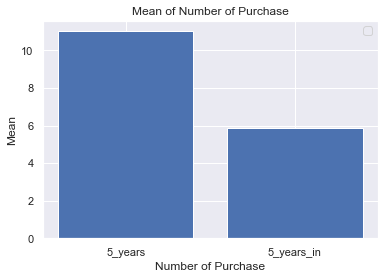

In [81]:
# visualize the mean of number of purchase
X = ['5_years', '5_years_in']
X_mean = [11.02, 5.89]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis, X_mean)
  
plt.xticks(X_axis, X)
plt.xlabel("Number of Purchase")
plt.ylabel("Mean")
plt.title("Mean of Number of Purchase")
plt.legend()
plt.show()

In [82]:
# the median of number of purchase
print("The median of number of purchase are: ")
data[['pur_3_years', 'pur_5_years', 'pur_3_years_indirect', 'pur_5_years_indirect']].median()

The median of number of purchase are: 


pur_3_years             3.0
pur_5_years             9.0
pur_3_years_indirect    2.0
pur_5_years_indirect    5.0
dtype: float64

No handles with labels found to put in legend.


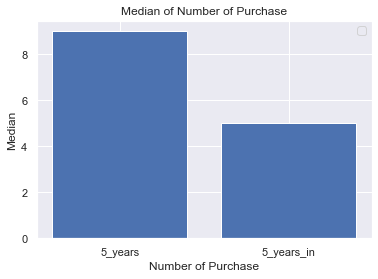

In [83]:
# visualize the median of number of purchase
X = ['5_years', '5_years_in']
X_median = [9, 5]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis, X_median)
  
plt.xticks(X_axis, X)
plt.xlabel("Number of Purchase")
plt.ylabel("Median")
plt.title("Median of Number of Purchase")
plt.legend()
plt.show()

In [84]:
# the mode of number of purchase
print("The mode of number of purchase are: ")
data[['pur_3_years', 'pur_5_years', 'pur_3_years_indirect', 'pur_5_years_indirect']].mode()

The mode of number of purchase are: 


,pur_3_years,pur_5_years,pur_3_years_indirect,pur_5_years_indirect
0,2,1,1,1


No handles with labels found to put in legend.


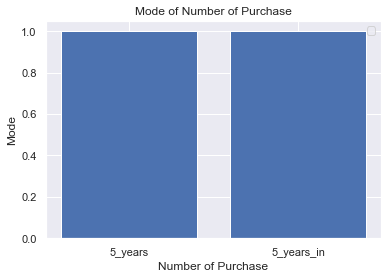

In [85]:
# visualize the mode of number of purchase
X = ['5_years', '5_years_in']
X_mode = [1, 1]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis, X_mode)
  
plt.xticks(X_axis, X)
plt.xlabel("Number of Purchase")
plt.ylabel("Mode")
plt.title("Mode of Number of Purchase")
plt.legend()
plt.show()

In [86]:
# import necessary packages
from collections import Counter

In [87]:
# multimodel data
Counter(data[['pur_3_years', 'pur_5_years', 'pur_3_years_indirect', 'pur_5_years_indirect']]).most_common()

[('pur_3_years', 1),
 ('pur_5_years', 1),
 ('pur_3_years_indirect', 1),
 ('pur_5_years_indirect', 1)]

In [88]:
# the mean of responded advertisement
print("The mean of responded advertisement are: ")
round(data[['ad_res_1_year', 'ad_res_3_year', 'ad_res_5_year', 'ad_res_ind_1_year', 'ad_res_ind_3_year', 'ad_res_ind_5_year']].mean(), 0)

The mean of responded advertisement are: 


ad_res_1_year        13.0
ad_res_3_year        30.0
ad_res_5_year        50.0
ad_res_ind_1_year     5.0
ad_res_ind_3_year    12.0
ad_res_ind_5_year    20.0
dtype: float64

No handles with labels found to put in legend.


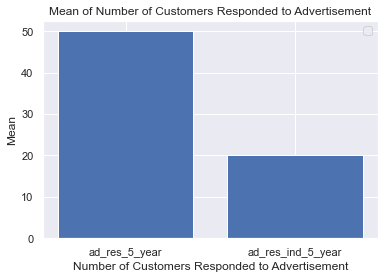

In [89]:
# visualize the mean of number of purchase
X = ['ad_res_5_year', 'ad_res_ind_5_year']
X_mean = [50, 20]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis, X_mean)
  
plt.xticks(X_axis, X)
plt.xlabel("Number of Customers Responded to Advertisement")
plt.ylabel("Mean")
plt.title("Mean of Number of Customers Responded to Advertisement")
plt.legend()
plt.show()

In [90]:
# the median of responded advertisement
print("The median of responded advertisement are: ")
round(data[['ad_res_1_year', 'ad_res_3_year', 'ad_res_5_year', 'ad_res_ind_1_year', 'ad_res_ind_3_year', 'ad_res_ind_5_year']].median(), 0)

The median of responded advertisement are: 


ad_res_1_year        12.0
ad_res_3_year        31.0
ad_res_5_year        50.0
ad_res_ind_1_year     6.0
ad_res_ind_3_year    13.0
ad_res_ind_5_year    20.0
dtype: float64

No handles with labels found to put in legend.


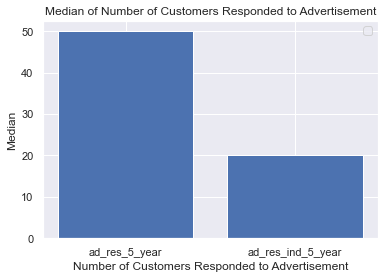

In [91]:
# visualize the median of number of purchase
X = ['ad_res_5_year', 'ad_res_ind_5_year']
X_median = [50, 20]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis, X_median)
  
plt.xticks(X_axis, X)
plt.xlabel("Number of Customers Responded to Advertisement")
plt.ylabel("Median")
plt.title("Median of Number of Customers Responded to Advertisement")
plt.legend()
plt.show()

In [92]:
# the mode of responded advertisement
print("The mode of responded advertisement are: ")
round(data[['ad_res_1_year', 'ad_res_3_year', 'ad_res_5_year', 'ad_res_ind_1_year', 'ad_res_ind_3_year', 'ad_res_ind_5_year']].mode(), 0)

The mode of responded advertisement are: 


,ad_res_1_year,ad_res_3_year,ad_res_5_year,ad_res_ind_1_year,ad_res_ind_3_year,ad_res_ind_5_year
0,13,32,13,6,15,23


No handles with labels found to put in legend.


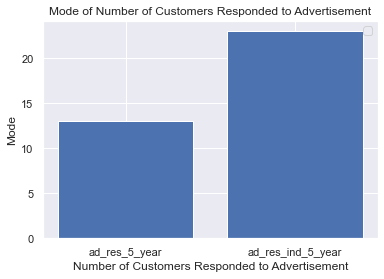

In [93]:
# visualize the mode of number of purchase
X = ['ad_res_5_year', 'ad_res_ind_5_year']
X_mode = [13, 23]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis, X_mode)
  
plt.xticks(X_axis, X)
plt.xlabel("Number of Customers Responded to Advertisement")
plt.ylabel("Mode")
plt.title("Mode of Number of Customers Responded to Advertisement")
plt.legend()
plt.show()

### 5.3.1 Insight

The most number of purchase the customers made in 5 years for direct and indirect purchase is 1 purchase only.

The average number of purchase the customers made in 5 years of direct purchase is 11 while average number of purchase the customers made in 5 years of indirect purchase is 5.

The most number of advertisement responded by customers in 5 years for direct advertisement is 13 while most number of advertisement responded by customers in 5 years for indirect advertisement is 23.

The average number of advertisement responded by customers in 5 years for direct advertisement is 50 while average number of advertisement responded by customers in 5 years for indirect advertisement is 20.

### 5.3.2 Handling Missing Values

In [94]:
# checking for missing values
data.isnull().sum()

potential_customer             0
cust_last_purchase          1882
pur_3_years                    0
pur_5_years                    0
pur_3_years_indirect           0
pur_5_years_indirect           0
pur_latest                     0
pur_3_years_avg                0
pur_5_years_avg                0
pur_3_years_avg_indirect     662
inact_last                     0
inact_first                    0
ad_res_1_year                  0
ad_res_3_year                  0
ad_res_5_year                  0
ad_res_ind_1_year              0
ad_res_ind_3_year              0
ad_res_ind_5_year              0
status_cust                    0
status_latest_ad               0
age                          793
gender                         0
cust_prop                      0
cust_ann_income                0
dtype: int64

#### 5.3.2.1 Cust_Last_Purchase

In [127]:
# fillna using mean
median_clp = data['cust_last_purchase'].median()
data['cust_last_purchase'] = data['cust_last_purchase'].fillna(median_clp)

##### 5.3.2.2 Pur_3_years_Avg_Indirect

In [128]:
# fillna with mean? but calculate mean from indirect or from the avg?
median_pur_3y_avg_ind = data.pur_3_years_avg_indirect.median()
data.pur_3_years_avg_indirect = data.pur_3_years_avg_indirect.fillna(median_pur_3y_avg_ind)

#### 5.3.2.3. Age 

In [129]:
# fillna using median
median_age = data['age'].median()
data['age'] = data['age'].fillna(median_age)

#### 5.3.2.4. Cust_Ann_Income 

In [98]:
# check the sum of missing values in the data frame
data.isna().sum()

# Observe that there is no missing values in 'cust_ann_income' column

potential_customer          0
cust_last_purchase          0
pur_3_years                 0
pur_5_years                 0
pur_3_years_indirect        0
pur_5_years_indirect        0
pur_latest                  0
pur_3_years_avg             0
pur_5_years_avg             0
pur_3_years_avg_indirect    0
inact_last                  0
inact_first                 0
ad_res_1_year               0
ad_res_3_year               0
ad_res_5_year               0
ad_res_ind_1_year           0
ad_res_ind_3_year           0
ad_res_ind_5_year           0
status_cust                 0
status_latest_ad            0
age                         0
gender                      0
cust_prop                   0
cust_ann_income             0
dtype: int64

# 6. Feature Engineering: 


## 6.1. Add Some High Level Features

In [130]:
# no of purchase = combine offline and online
data['total_purchase'] = data.pur_5_years + data.pur_5_years_indirect

# period of activity = first inactive - last inactive
data['period_of_active'] = data.inact_first - data.inact_last

# total purchase coming from ads = combine ads
data['total_ads_res'] = data.ad_res_5_year + data.ad_res_ind_5_year

# update new columns created as numerical columns 
new_col = ['total_purchase', 'period_of_active', 'total_ads_res']
for i in new_col:
  NumCols.append(i)
  
data.head()

,potential_customer,cust_last_purchase,pur_3_years,pur_5_years,pur_3_years_indirect,pur_5_years_indirect,pur_latest,pur_3_years_avg,pur_5_years_avg,pur_3_years_avg_indirect,inact_last,inact_first,ad_res_1_year,ad_res_3_year,ad_res_5_year,ad_res_ind_1_year,ad_res_ind_3_year,ad_res_ind_5_year,status_cust,status_latest_ad,age,gender,cust_prop,cust_ann_income,total_purchase,period_of_active,total_ads_res
0,1,5.0,2,17,2,4,0.0,7.50,7.76,7.50,14,110,32,48,73,3,12,16,A,0,71.0,F,H,65957.0,21,96,89
1,1,30.0,1,7,0,3,25.0,25.00,13.00,11.67,18,75,13,35,55,6,6,22,A,1,7.0,M,U,0.0,10,57,77
2,0,11.0,5,12,3,5,15.0,15.00,11.25,14.67,19,57,14,35,53,6,17,22,S,1,79.0,F,U,0.0,17,38,75
3,1,20.0,1,11,0,3,20.0,20.00,12.45,11.67,5,113,17,38,71,8,8,33,A,0,73.0,F,U,76293.0,14,108,104
4,1,5.0,3,15,2,7,3.0,4.33,3.80,4.00,17,118,13,28,63,6,12,24,S,1,68.0,F,H,113663.0,22,101,87


## 6.2. Explore Relationship Between Numerical variables & Target Variable

In [99]:
# define catcols and numcols
catcols_temp = ['status_cust', 'status_latest_ad', 'gender', 'cust_prop']
numcols_temp = list(set(data.columns) - set(catcols_temp))

# summarize the numerical variables associated with target variable
data[numcols_temp].groupby('potential_customer').describe()

# the max values for all numerical variables to target variable are balance

ad_res_1_year                                              \
                           count       mean       std  min   25%   50%   75%   
potential_customer                                                             
0                         1882.0  12.775770  4.452799  3.0  11.0  12.0  13.0   
1                         1736.0  13.309332  5.409720  4.0  11.0  12.5  14.0   

                             age                                               \
                     max   count       mean        std  min   25%   50%   75%   
potential_customer                                                              
0                   42.0  1882.0  58.698725  15.281136  0.0  49.0  60.0  69.0   
1                   49.0  1736.0  59.813940  14.540114  6.0  51.0  60.0  71.0   

                         pur_3_years_indirect                                \
                     max                count      mean       std  min  25%   
potential_customer                                                            
0                   87.0               1882.0  1.698193  1.496154  0.0  1.0   
1                   87.0               1736.0  2.137673  1.725566  0.0  1.0   

                                  pur_3_years_avg_indirect             \
                    50%  75%  max                    count       mean   
potential_customer                                                      
0                   1.0  2.0  9.0                   1882.0  14.058852   
1                   2.0  3.0  9.0                   1736.0  12.336146   

                                                             ad_res_5_year  \
                         std   min   25%    50%   75%    max         count   
potential_customer                                                           
0                   9.854071  1.75  10.0  11.67  16.0  260.0        1882.0   
1                   7.452332  2.00   8.0  11.67  15.0  100.0        1736.0   

                                                                        \
                         mean        std  min   25%   50%   75%    max   
potential_customer                                                       
0                   47.854942  22.619749  7.0  29.0  48.0  65.0  142.0   
1                   51.520737  22.981928  7.0  33.0  53.0  67.0  157.0   

                   pur_5_years                                             \
                         count       mean       std  min  25%   50%   75%   
potential_customer                                                          
0                       1882.0  10.133900  9.045583  1.0  4.0   8.0  14.0   
1                       1736.0  11.978111  9.692541  1.0  5.0  10.0  16.0   

                         ad_res_ind_3_year                                  \
                     max             count       mean       std  min   25%   
potential_customer                                                           
0                   80.0            1882.0  11.635494  4.633738  2.0   7.0   
1                   91.0            1736.0  12.529378  4.453442  2.0  10.0   

                                     cust_ann_income                \
                     50%   75%   max           count          mean   
potential_customer                                                   
0                   13.0  15.0  22.0          1882.0  42150.353879   
1                   14.0  16.0  28.0          1736.0  41021.897465   

                                                                              \
                             std  min       25%      50%       75%       max   
potential_customer                                                             
0                   26017.302238  0.0  32587.50  44596.0  56534.25  174305.0   
1                   26242.338173  0.0  29852.25  44022.5  56502.00  154945.0   

                   ad_res_3_year                                              \
                           count       mean       std  min   25%   50%   75%   

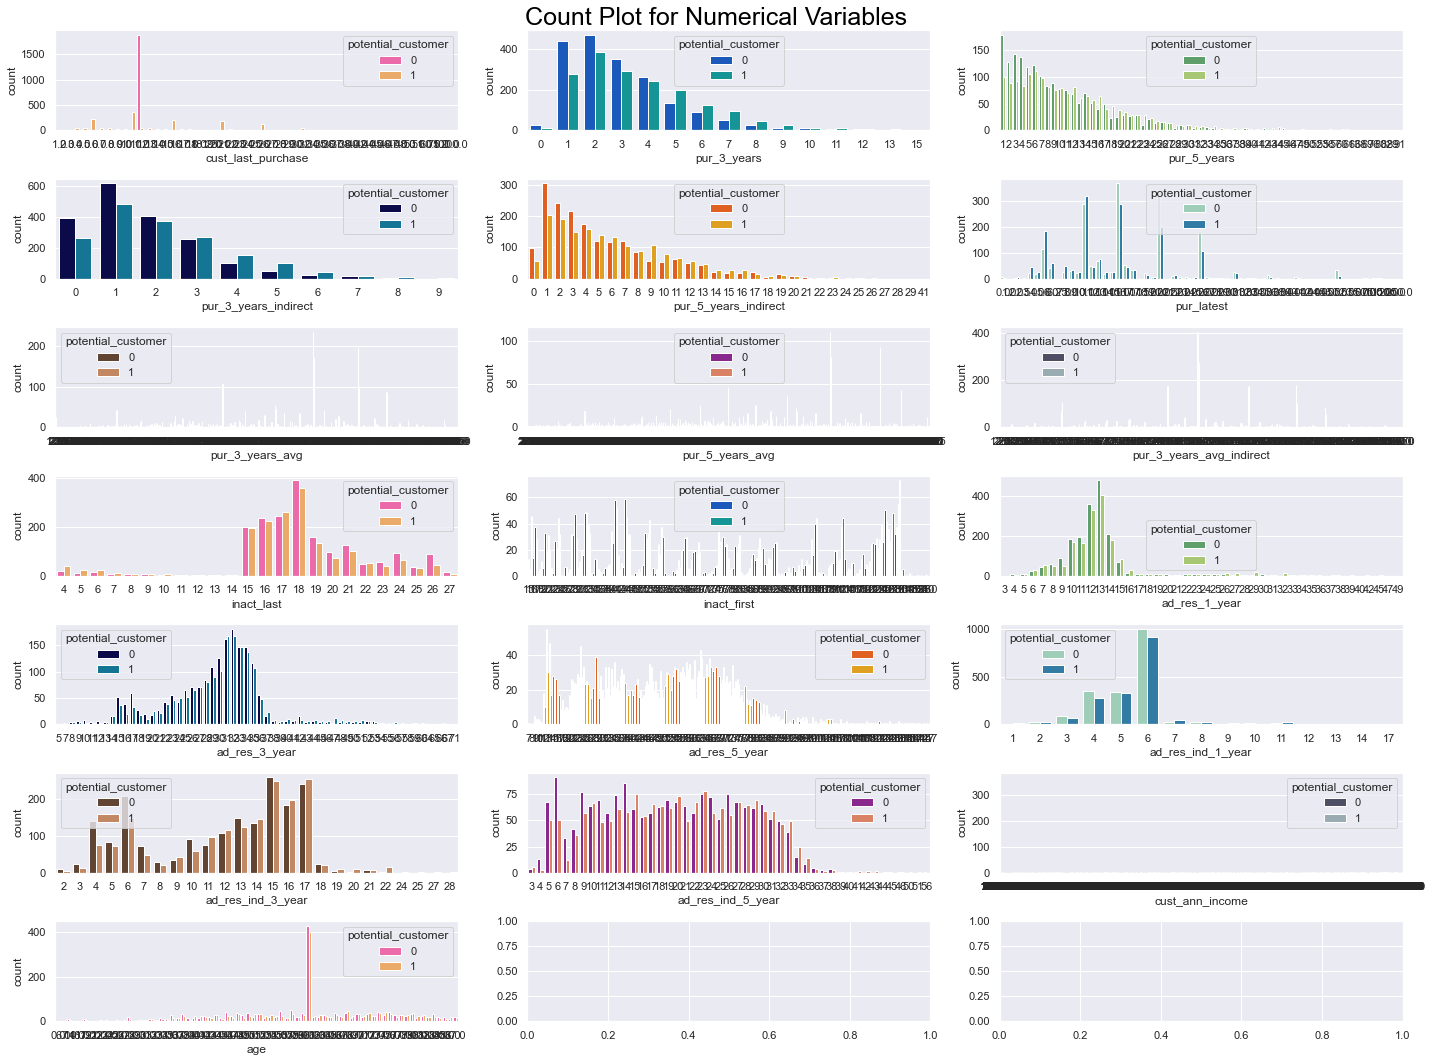

In [100]:
# create a figure
fig, ax = plt.subplots(7, 3, figsize=(20,15))

plt.suptitle('Count Plot for Numerical Variables', fontsize=25, color='black')

ax1 = sns.countplot(x='cust_last_purchase', data=data, hue='potential_customer', ax=ax[0,0], palette='spring')
ax1.set(xlabel='cust_last_purchase')

ax2 = sns.countplot(x='pur_3_years', data=data, hue='potential_customer', ax=ax[0,1], palette='winter')
ax2.set(xlabel='pur_3_years')

ax3 = sns.countplot(x='pur_5_years', data=data, hue='potential_customer', ax=ax[0,2], palette='summer')
ax3.set(xlabel = 'pur_5_years')

ax4 = sns.countplot(x='pur_3_years_indirect', data=data, hue='potential_customer', ax=ax[1,0], palette='ocean')
ax4.set(xlabel='pur_3_years_indirect')

ax5 = sns.countplot(x='pur_5_years_indirect', data=data, hue='potential_customer', ax=ax[1,1], palette='autumn')
ax5.set(xlabel='pur_5_years_indirect')

ax6 = sns.countplot(x='pur_latest', data=data, hue='potential_customer', ax=ax[1,2], palette='YlGnBu')
ax6.set(xlabel='pur_latest')

ax7 = sns.countplot(x='pur_3_years_avg', data=data, hue='potential_customer', ax=ax[2,0], palette='copper')
ax7.set(xlabel='pur_3_years_avg')

ax8 = sns.countplot(x='pur_5_years_avg', data=data, hue='potential_customer', ax=ax[2,1], palette='plasma')
ax8.set(xlabel='pur_5_years_avg')

ax9 = sns.countplot(x='pur_3_years_avg_indirect', data=data, hue='potential_customer', ax=ax[2,2], palette='bone')
ax9.set(xlabel='pur_3_years_avg_indirect')

ax10 = sns.countplot(x='inact_last', data=data, hue='potential_customer', ax=ax[3,0], palette='spring')
ax10.set(xlabel='inact_last')

ax11 = sns.countplot(x='inact_first', data=data, hue='potential_customer', ax=ax[3,1], palette='winter')
ax11.set(xlabel='inact_first')

ax12 = sns.countplot(x='ad_res_1_year', data=data, hue='potential_customer', ax=ax[3,2], palette='summer')
ax12.set(xlabel='ad_res_1_year')

ax13 = sns.countplot(x='ad_res_3_year', data=data, hue='potential_customer', ax=ax[4,0], palette='ocean')
ax13.set(xlabel='ad_res_3_year')

ax14 = sns.countplot(x='ad_res_5_year', data=data, hue='potential_customer', ax=ax[4,1], palette='autumn')
ax14.set(xlabel='ad_res_5_year')

ax15 = sns.countplot(x='ad_res_ind_1_year', data=data, hue='potential_customer', ax=ax[4,2], palette='YlGnBu')
ax15.set(xlabel='ad_res_ind_1_year')

ax16 = sns.countplot(x='ad_res_ind_3_year', data=data, hue='potential_customer', ax=ax[5,0], palette='copper')
ax16.set(xlabel='ad_res_ind_3_year')

ax17 = sns.countplot(x='ad_res_ind_5_year', data=data, hue='potential_customer', ax=ax[5,1], palette='plasma')
ax17.set(xlabel='ad_res_ind_5_year')

ax18 = sns.countplot(x='cust_ann_income', data=data, hue='potential_customer', ax=ax[5,2], palette='bone')
ax18.set(xlabel='cust_ann_income')

ax19 = sns.countplot(x='age', data=data, hue='potential_customer', ax=ax[6,0], palette='spring')
ax19.set(xlabel='age')

plt.tight_layout()
plt.show()

## 6.3. Explore Correlation between Numerical Variables

In [101]:
# define catcols and numcols
catcols = ['potential_customer', 'status_cust', 'status_latest_ad', 'gender', 'cust_prop']
numcols = list(set(data.columns) - set(catcols))

# find correlation between numerical variables
data[numcols].corr().style.background_gradient(cmap="YlGnBu")

,ad_res_1_year,age,pur_3_years_indirect,pur_3_years_avg_indirect,ad_res_5_year,pur_5_years,ad_res_ind_3_year,cust_ann_income,ad_res_3_year,ad_res_ind_5_year,pur_5_years_indirect,inact_last,cust_last_purchase,pur_3_years,pur_latest,pur_5_years_avg,ad_res_ind_1_year,inact_first,pur_3_years_avg
ad_res_1_year,1.000000,0.091734,0.165172,0.092260,0.527500,0.321440,0.357592,0.005792,0.782275,0.329764,0.181457,-0.564820,0.063346,0.197819,0.033439,0.080269,0.661544,0.150162,0.085542
age,0.091734,1.000000,0.041000,-0.035248,0.187928,0.161632,0.063118,-0.045744,0.097340,0.178165,0.155550,-0.088064,-0.036675,0.057117,-0.051166,-0.080779,0.050276,0.204421,-0.049210
pur_3_years_indirect,0.165172,0.041000,1.000000,-0.201903,0.231537,0.478441,0.639989,-0.044092,0.275014,0.252604,0.566286,-0.168513,-0.166812,0.842210,-0.296213,-0.292267,0.274756,0.129750,-0.293545
pur_3_years_avg_indirect,0.092260,-0.035248,-0.201903,1.000000,-0.060480,-0.212063,0.025883,0.052837,0.019767,-0.085308,-0.203981,0.067728,0.359100,-0.310144,0.637831,0.710461,0.022037,-0.112204,0.824429
ad_res_5_year,0.527500,0.187928,0.231537,-0.060480,1.000000,0.790215,0.448746,-0.005562,0.728215,0.944387,0.750877,-0.239222,-0.035041,0.301513,-0.106823,-0.215725,0.408179,0.855834,-0.072774
pur_5_years,0.321440,0.161632,0.478441,-0.212063,0.790215,1.000000,0.427481,-0.043361,0.466951,0.756462,0.905120,-0.241410,-0.126045,0.557350,-0.260562,-0.339597,0.240929,0.709486,-0.248276
ad_res_ind_3_year,0.357592,0.063118,0.639989,0.025883,0.448746,0.427481,1.000000,0.001534,0.624917,0.487999,0.457074,-0.175138,-0.069391,0.593459,-0.133058,-0.179683,0.611498,0.259583,-0.115329
cust_ann_income,0.005792,-0.045744,-0.044092,0.052837,-0.005562,-0.043361,0.001534,1.000000,0.013581,-0.009323,-0.041983,0.032755,0.036915,-0.074388,0.071228,0.062140,0.034317,-0.028742,0.055722
ad_res_3_year,0.782275,0.097340,0.275014,0.019767,0.728215,0.466951,0.624917,0.013581,1.000000,0.638305,0.368464,-0.350155,0.022068,0.384991,-0.022255,-0.090136,0.715558,0.401906,0.032629
ad_res_ind_5_year,0.329764,0.178165,0.252604,-0.085308,0.944387,0.756462,0.487999,-0.009323,0.638305,1.000000,0.779955,-0.138193,-0.059653,0.330041,-0.121806,-0.261724,0.402181,0.902457,-0.096414


# 7. Feature Selection

In [102]:
print(data.shape)
data.head()

(3618, 24)


,potential_customer,cust_last_purchase,pur_3_years,pur_5_years,pur_3_years_indirect,pur_5_years_indirect,pur_latest,pur_3_years_avg,pur_5_years_avg,pur_3_years_avg_indirect,inact_last,inact_first,ad_res_1_year,ad_res_3_year,ad_res_5_year,ad_res_ind_1_year,ad_res_ind_3_year,ad_res_ind_5_year,status_cust,status_latest_ad,age,gender,cust_prop,cust_ann_income
0,1,5.0,2,17,2,4,0.0,7.50,7.76,7.50,14,110,32,48,73,3,12,16,A,0,71.0,F,H,65957.0
1,1,30.0,1,7,0,3,25.0,25.00,13.00,11.67,18,75,13,35,55,6,6,22,A,1,7.0,M,U,0.0
2,0,11.0,5,12,3,5,15.0,15.00,11.25,14.67,19,57,14,35,53,6,17,22,S,1,79.0,F,U,0.0
3,1,20.0,1,11,0,3,20.0,20.00,12.45,11.67,5,113,17,38,71,8,8,33,A,0,73.0,F,U,76293.0
4,1,5.0,3,15,2,7,3.0,4.33,3.80,4.00,17,118,13,28,63,6,12,24,S,1,68.0,F,H,113663.0


# 8. Data PreProcessing

## 8.1 Dummy Variables

In [131]:
data[NumCols]

,ad_res_1_year,age,pur_3_years_indirect,pur_3_years_avg_indirect,ad_res_5_year,pur_5_years,ad_res_ind_3_year,cust_ann_income,ad_res_3_year,ad_res_ind_5_year,pur_5_years_indirect,inact_last,cust_last_purchase,pur_3_years,pur_latest,pur_5_years_avg,ad_res_ind_1_year,inact_first,pur_3_years_avg,total_purchase,period_of_active,total_ads_res
0,32,71.0,2,7.50,73,17,12,65957.0,48,16,4,14,5.0,2,0.0,7.76,3,110,7.50,21,96,89
1,13,7.0,0,11.67,55,7,6,0.0,35,22,3,18,30.0,1,25.0,13.00,6,75,25.00,10,57,77
2,14,79.0,3,14.67,53,12,17,0.0,35,22,5,19,11.0,5,15.0,11.25,6,57,15.00,17,38,75
3,17,73.0,0,11.67,71,11,8,76293.0,38,33,3,5,20.0,1,20.0,12.45,8,113,20.00,14,108,104
4,13,68.0,2,4.00,63,15,12,113663.0,28,24,7,17,5.0,3,3.0,3.80,6,118,4.33,22,101,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3613,13,33.0,0,11.67,47,6,6,83754.0,34,17,1,19,20.0,2,20.0,13.33,6,57,16.50,7,38,64
3614,13,81.0,4,13.25,88,31,17,83754.0,32,35,21,17,11.0,7,13.0,10.94,6,128,12.71,52,111,123
3615,16,39.0,6,12.50,57,13,18,0.0,36,24,8,4,11.0,7,3.0,10.62,7,80,12.43,21,76,81
3616,11,76.0,1,20.00,61,11,15,71618.0,31,25,7,24,11.0,1,20.0,16.55,6,93,20.00,18,69,86


In [132]:
X_cat = data[CatCols]

In [133]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
data_cat = onehotencoder.fit_transform(X_cat).toarray()

In [134]:
data_cat = pd.DataFrame(data_cat)
data_cat.shape

(3618, 15)

In [135]:
data_num = data[NumCols]

In [51]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3618 entries, 0 to 3617
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ad_res_1_year             3618 non-null   int64  
 1   age                       3618 non-null   float64
 2   pur_3_years_indirect      3618 non-null   int64  
 3   pur_3_years_avg_indirect  3618 non-null   float64
 4   potential_customer        3618 non-null   int64  
 5   ad_res_5_year             3618 non-null   int64  
 6   pur_5_years               3618 non-null   int64  
 7   ad_res_ind_3_year         3618 non-null   int64  
 8   cust_ann_income           3618 non-null   object 
 9   ad_res_3_year             3618 non-null   int64  
 10  ad_res_ind_5_year         3618 non-null   int64  
 11  pur_5_years_indirect      3618 non-null   int64  
 12  inact_last                3618 non-null   int64  
 13  cust_last_purchase        3618 non-null   float64
 14  pur_3_ye

In [20]:
X_all = pd.concat([data_cat, data_num], axis=1)
X_all

,0,1,2,3,4,5,6,7,8,9,10,11,12,ad_res_1_year,age,pur_3_years_indirect,pur_3_years_avg_indirect,potential_customer,ad_res_5_year,pur_5_years,ad_res_ind_3_year,cust_ann_income,ad_res_3_year,ad_res_ind_5_year,pur_5_years_indirect,inact_last,cust_last_purchase,pur_3_years,pur_latest,pur_5_years_avg,ad_res_ind_1_year,inact_first,pur_3_years_avg,total_purchase,period_of_active,total_ads_res
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,32,71.0,2,7.50,1,73,17,12,65957.00,48,16,4,14,5.0,2,0.0,7.76,3,110,7.50,21,96,89
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,13,7.0,0,11.67,1,55,7,6,0.00,35,22,3,18,30.0,1,25.0,13.00,6,75,25.00,10,57,77
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,14,79.0,3,14.67,0,53,12,17,0.00,35,22,5,19,11.0,5,15.0,11.25,6,57,15.00,17,38,75
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,17,73.0,0,11.67,1,71,11,8,76293.00,38,33,3,5,20.0,1,20.0,12.45,8,113,20.00,14,108,104
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,13,68.0,2,4.00,1,63,15,12,113663.00,28,24,7,17,5.0,3,3.0,3.80,6,118,4.33,22,101,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3613,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,13,33.0,0,11.67,1,47,6,6,83754.00,34,17,1,19,20.0,2,20.0,13.33,6,57,16.50,7,38,64
3614,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,13,81.0,4,13.25,0,88,31,17,83754.00,32,35,21,17,11.0,7,13.0,10.94,6,128,12.71,52,111,123
3615,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,16,39.0,6,12.50,0,57,13,18,0.00,36,24,8,4,11.0,7,3.0,10.62,7,80,12.43,21,76,81
3616,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,11,76.0,1,20.00,0,61,11,15,71618.00,31,25,7,24,11.0,1,20.0,16.55,6,93,20.00,18,69,86


In [21]:
# import libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import make_pipeline

## 8.2 Data Scaling

In [139]:
# S1: Define independent variable, X and dependent variable, y
X = X_all.drop('potential_customer', axis =1)

y = X_all.potential_customer

In [140]:
# S2: Split train and test dataset
#Done at above

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25 , 
                                  random_state = 42, stratify = y)

In [141]:
# S3: Do feature scalling
scaler = StandardScaler()

X_scaled_train = scaler.fit_transform(X_train)

X_scaled_tets = scaler.fit_transform(X_train)

# 9. Model Creation

In [142]:
# S4 : Define Classifier

# KNN Classifier

#define param grid
knn_param_grid = {'n_neighbors': np.arange(1, 10),
              'p': [1,2],
              'weights': ['uniform','distance']}

knn_grid = GridSearchCV(KNeighborsClassifier(), 
                    knn_param_grid, scoring='roc_auc', cv=5, return_train_score=True)

#fit the data to gridsearchCV
knn_grid.fit(X_train, y_train)

#Show best parameters
print("KNN Best Parameters", knn_grid.best_params_)

#Define KNN with best estimator
knn_model = knn_grid.best_estimator_



KNN Best Parameters {'n_neighbors': 8, 'p': 1, 'weights': 'distance'}


In [26]:
# Decision Tree Classifier

# Define param grid
dt_param_grid = {'max_depth': np.arange(1,10)}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=1), 
                    dt_param_grid, scoring='roc_auc', cv=5, return_train_score=True)

# Fit the data to gridsearchCV
dt_grid.fit(X_train, y_train)

# Show best parameters
print("Decision Tree best parameters: ",dt_grid.best_params_)

# Define Decision Tree with best estimator
dt_model = dt_grid.best_estimator_


Decision Tree best parameters:  {'max_depth': 3}


In [27]:
# Logistic Regression

# Define param grid
lr_param_grid = {'fit_intercept': [True,False],
                 'C': [0.001, 0.004, 0.01, 0.1, 1],
                 'penalty' : ['l1', 'l2']}

logr_grid = GridSearchCV(LogisticRegression(solver='liblinear'), 
                    lr_param_grid, scoring='roc_auc', cv=5, return_train_score=True)

# Fit the data to gridsearchCV
logr_grid.fit(X_train, y_train)

# Show best parameters
print("Logistic Regression best parameters: ",logr_grid.best_params_)

# Define Logistic Regression with best estimator
logr_model = logr_grid.best_estimator_

Logistic Regression best parameters:  {'C': 0.01, 'fit_intercept': True, 'penalty': 'l2'}


In [43]:
# Polynomial Logistic Regression

# Make a polynomial pipeline
poly_pipeline = make_pipeline(PolynomialFeatures(degree=2, include_bias=False),
                             MinMaxScaler(),
                             LogisticRegression())
print(poly_pipeline)

# Define param grid
pip_param_grid = {'polynomialfeatures__degree':[1,2,3],
                 'logisticregression__C':[0.01, 0.1, 0.4, 1, 5],
                 'logisticregression__penalty':['l1','l2'],
                 'logisticregression__solver':['liblinear'],
                 'logisticregression__fit_intercept':[True,False]}

pip_grid = GridSearchCV(poly_pipeline, pip_param_grid, cv=5, scoring='roc_auc', 
                        return_train_score=True)

# Fit the data to gridsearchCV
pip_grid.fit(X_train, y_train)

# Show best parameters
print("Logistic Regression Polynomial best parameters: ",pip_grid.best_params_)

# Define Polynomial Logistic Regression with best estimator
pip_model = pip_grid.best_estimator_

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression())])
Logistic Regression Polynomial best parameters:  {'logisticregression__C': 5, 'logisticregression__fit_intercept': False, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear', 'polynomialfeatures__degree': 3}


In [28]:
# Naive Bayes 

nb_model = GaussianNB().fit(X_train, y_train)

# 10. Model Evaluation & Comparison

In [29]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, precision_recall_curve, roc_curve, auc

In [143]:
print("KNN Best Train Score = ", knn_grid.best_score_)

knn_pred = knn_model.predict(X_test)
print("Knn Best model confusion matrix on test data \n", confusion_matrix(y_test, knn_pred))
print("*****************************************")
print("Knn Best model Precision score on test data = {:.2f}".format(precision_score(y_test, knn_pred)))
print("Knn Best model Recall score on test data = {:.2f}".format(recall_score(y_test, knn_pred)))
print("Knn Best model F1 score on test data = {:.2f}".format(f1_score(y_test, knn_pred)))
print("Knn Best model Accuracy score on test data = {:.2f}".format(accuracy_score(y_test, knn_pred)))


KNN Best Train Score =  0.5502486475104427
Knn Best model confusion matrix on test data 
 [[272 199]
 [204 230]]
*****************************************
Knn Best model Precision score on test data = 0.54
Knn Best model Recall score on test data = 0.53
Knn Best model F1 score on test data = 0.53
Knn Best model Accuracy score on test data = 0.55


In [40]:
print("Decision Tree Best Train Scores: ",dt_grid.best_score_)

dt_pred = dt_model.predict(X_test)
print("Knn Best model confusion matrix on test data \n", confusion_matrix(y_test, dt_pred))
print("*****************************************")
print("DT Best model Precision score on test data = {:.2f}".format(precision_score(y_test, dt_pred)))
print("DT Best model Recall score on test data = {:.2f}".format(recall_score(y_test, dt_pred)))
print("DT Best model F1 score on test data = {:.2f}".format(f1_score(y_test, dt_pred)))
print("Dt Best model Accuracy score on test data = {:.2f}".format(accuracy_score(y_test, dt_pred)))
print("^_^")

Decision Tree Best Train Scores:  0.9931079487636684
Knn Best model confusion matrix on test data 
 [[471   0]
 [  6 428]]
*****************************************
DT Best model Precision score on test data = 1.00
DT Best model Recall score on test data = 0.99
DT Best model F1 score on test data = 0.99
Dt Best model Accuracy score on test data = 0.99
^_^


In [41]:
print("Logistic Regression Best Train Scores: ",logr_grid.best_score_)

logr_pred = logr_model.predict(X_test)
print("LR Best model confusion matrix on test data \n", confusion_matrix(y_test, logr_pred))
print("*****************************************")
print("LR Best model Precision score on test data = {:.2f}".format(precision_score(y_test, logr_pred)))
print("LR Best model Recall score on test data = {:.2f}".format(recall_score(y_test, logr_pred)))
print("LR Best model F1 score on test data = {:.2f}".format(f1_score(y_test, logr_pred)))
print("LR Best model Accuracy score on test data = {:.2f}".format(accuracy_score(y_test, logr_pred)))
print("^_^")

Logistic Regression Best Train Scores:  0.7435610309096228
LR Best model confusion matrix on test data 
 [[318 153]
 [173 261]]
*****************************************
LR Best model Precision score on test data = 0.63
LR Best model Recall score on test data = 0.60
LR Best model F1 score on test data = 0.62
LR Best model Accuracy score on test data = 0.64
^_^


In [45]:
print("Logistic Regression Polynomial best scores: ",pip_grid.best_score_)

pip_pred = pip_model.predict(X_test)
print("PIP Best model confusion matrix on test data \n", confusion_matrix(y_test, pip_pred))
print("*****************************************")
print("PIP Best model Precision score on test data = {:.2f}".format(precision_score(y_test, pip_pred)))
print("PIP Best model Recall score on test data = {:.2f}".format(recall_score(y_test, pip_pred)))
print("PIP Best model F1 score on test data = {:.2f}".format(f1_score(y_test, pip_pred)))
print("PIP Best model Accuracy score on test data = {:.2f}".format(accuracy_score(y_test, pip_pred)))
print("^_^")

Logistic Regression Polynomial best scores:  0.8419530709302805
PIP Best model confusion matrix on test data 
 [[383  88]
 [132 302]]
*****************************************
PIP Best model Precision score on test data = 0.77
PIP Best model Recall score on test data = 0.70
PIP Best model F1 score on test data = 0.73
PIP Best model Accuracy score on test data = 0.76
^_^


In [42]:
print("Naive Bayes Best Train Scores: ",nb_model.score(X_train, y_train))

nb_pred = nb_model.predict(X_test)
print("NB Best model confusion matrix on test data \n", confusion_matrix(y_test, nb_pred))
print("*****************************************")
print("NB Best model Precision score on test data = {:.2f}".format(precision_score(y_test, nb_pred)))
print("NB Best model Recall score on test data = {:.2f}".format(recall_score(y_test, nb_pred)))
print("NB Best model F1 score on test data = {:.2f}".format(f1_score(y_test, nb_pred)))
print("NB Best model Accuracy score on test data = {:.2f}".format(accuracy_score(y_test, nb_pred)))
print("^_^")

Naive Bayes Best Train Scores:  0.8422410615554736
NB Best model confusion matrix on test data 
 [[428  43]
 [ 85 349]]
*****************************************
NB Best model Precision score on test data = 0.89
NB Best model Recall score on test data = 0.80
NB Best model F1 score on test data = 0.85
NB Best model Accuracy score on test data = 0.86
^_^
